### Código para descargar y consolidar datos de Quién es quién en los precios de Profeco

La información es de 2015 a 2022

In [225]:
#Librerías
import pandas as pd
import requests
import os
import patoolib
import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import matplotlib.ticker as ticker
import locale

# Locale para Mex
locale.setlocale(locale.LC_ALL, 'es_MX')

'es_MX'

In [3]:
#Cambiar directorio de trabajo
#os.chdir("C:/Users/claudio.pacheco/Documents/")
os.chdir("D:/")
#Crear carpeta. Si ya existe, no la crea
os.makedirs("profeco", exist_ok=True)

In [3]:
#Lista de urls
urls=["https://datos.profeco.gob.mx/datos_abiertos/file.php?t=4ecfa981c01e742a5461bf543a7b4108",
      "https://datos.profeco.gob.mx/datos_abiertos/file.php?t=c388a30cb3f4b4c4fa29302618ef5557",
      "https://datos.profeco.gob.mx/datos_abiertos/file.php?t=059e79ffa462f6f51ed3aa1dbfa83a70",
      "https://datos.profeco.gob.mx/datos_abiertos/file.php?t=01fafa951fb6c82e6e4bb491af8f1688",
      "https://datos.profeco.gob.mx/datos_abiertos/file.php?t=09939d92d2afcde64dbc06e057877e16",
      "https://datos.profeco.gob.mx/datos_abiertos/file.php?t=4df382eefa26f1f0d28d3a11aaf41add",
      "https://datos.profeco.gob.mx/datos_abiertos/file.php?t=493b83b886f0266909d783fc8f776b11",
      "https://datos.profeco.gob.mx/datos_abiertos/file.php?t=af88f42c5cb82c6c35dd962b1ae69051"
      ]

In [4]:
# Define the destination folder for the downloaded files
folder_path = "profeco"

for url in urls:
    # Define the file name and path
    file_name = "temp.rar"
    file_path = os.path.join(folder_path, file_name)
    
    # Download the file
    response = requests.get(url)
    
    # Save the file to the destination folder
    with open(file_path, 'wb') as f:
        f.write(response.content)
    
    # Extract the files from the RAR archive
    patoolib.extract_archive(file_path, outdir=folder_path)
    
    # Remove the RAR file
    os.remove(file_path)


patool: Extracting profeco\temp.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- D:\profeco\temp.rar
patool:     with cwd=profeco


In [13]:
#Concatenar archivos de las carpetas en un solo dataframe
#Lista de carpetas
carpetas = os.listdir("profeco")
#Lista de archivos
archivos = [os.listdir("profeco/"+carpeta) for carpeta in carpetas]

In [37]:
carpetas

['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [74]:
archivos

[['012015.csv',
  '022015.csv',
  '032015.csv',
  '042015.csv',
  '052015.csv',
  '062015.csv',
  '072015.csv',
  '082015.csv',
  '092015.csv',
  '102015.csv',
  '112015.csv',
  '122015.csv',
  '132015.csv',
  '142015.csv',
  '152015.csv',
  '162015.csv',
  '172015.csv',
  '182015.csv',
  '192015.csv',
  '202015.csv',
  '212015.csv',
  '222015.csv',
  '232015.csv',
  '242015.csv',
  '252015.csv',
  '262015.csv',
  '272015.csv',
  '282015.csv',
  '292015.csv',
  '302015.csv',
  '312015.csv',
  '322015.csv',
  '332015.csv',
  '342015.csv',
  '352015.csv',
  '362015.csv',
  '372015.csv',
  '382015.csv',
  '392015.csv',
  '402015.csv',
  '412015.csv',
  '422015.csv',
  '432015.csv',
  '442015.csv',
  '452015.csv',
  '462015.csv',
  '472015.csv',
  '482015.csv',
  '492015.csv',
  '502015.csv',
  '512015.csv',
  '522015.csv',
  '532015.csv'],
 ['022016.csv',
  '032016.csv',
  '042016.csv',
  '052016.csv',
  '062016.csv',
  '072016.csv',
  '082016.csv',
  '092016.csv',
  '102016.csv',
  '1120

In [114]:


periodos = ["2015-11-13_2015-11-16",
            "2016-11-18_2016-11-21",
            "2017-11-17_2017-11-20",
            "2018-11-16_2018-11-19",
            "2019-11-15_2019-11-18",
            "2020-11-09_2020-11-20",
            "2021-11-10_2021-11-16",
            "2022-11-18_2022-11-21"]

week_numbers_bf = {}

for periodo in periodos:
    inicio, fin = periodo.split("_")
    inicio_date = datetime.datetime.strptime(inicio, "%Y-%m-%d")
    fin_date = datetime.datetime.strptime(fin, "%Y-%m-%d")
    inicio_year = inicio_date.year
    fin_year = fin_date.year
    week_number_inicio = inicio_date.isocalendar()[1]
    week_number_fin = fin_date.isocalendar()[1]
    if week_number_fin < week_number_inicio:
        week_number_fin = datetime.date(int(fin[:4]), 12, 31).isocalendar()[1]
    if inicio_year == fin_year:
        if inicio_year in week_numbers_bf:
            week_numbers_bf[inicio_year].append(range(week_number_inicio, week_number_fin+1))
        else:
            week_numbers_bf[inicio_year] = [range(week_number_inicio, week_number_fin+1)]
    else:
        if inicio_year in week_numbers_bf:
            week_numbers_bf[inicio_year].append(range(week_number_inicio, 53))
        else:
            week_numbers_bf[inicio_year] = [range(week_number_inicio, 53)]
        for year in range(inicio_year+1, fin_year):
            if year in week_numbers:
                week_numbers_bf[year].append(range(1, 53))
            else:
                week_numbers[year] = [range(1, 53)]
        if fin_year in week_numbers_bf:
            week_numbers_bf[fin_year].append(range(1, week_number_fin+1))
        else:
            week_numbers_bf[fin_year] = [range(1, week_number_fin+1)]

In [212]:
week_numbers_bf

{2015: [range(46, 48)],
 2016: [range(46, 48)],
 2017: [range(46, 48)],
 2018: [range(46, 48)],
 2019: [range(46, 48)],
 2020: [range(46, 48)],
 2021: [range(45, 47)],
 2022: [range(46, 48)]}

In [201]:
# Periods with 4 weeks before and after
periods = ["2015-10-16_2015-11-20",
           "2016-10-14_2016-11-18",
           "2017-10-13_2017-11-17",
           "2018-10-12_2018-11-16",
           "2019-11-01_2019-11-29",
           "2020-11-09_2020-11-20",
           "2021-11-05_2021-12-03",
           "2022-11-04_2022-12-02"]

# Generate list of week numbers for each period
week_numbers = {}
for period in periods:
    start_date, end_date = period.split("_")
    start_week = datetime.datetime.strptime(start_date, "%Y-%m-%d").isocalendar()[1]
    end_week = datetime.datetime.strptime(end_date, "%Y-%m-%d").isocalendar()[1]
    year = int(start_date[:4])
    week_nums = []
    for week in range(start_week-4, end_week+5):
        if week < 1:
            year -= 1
            week_nums.append(52 + week)
        elif week > 52:
            year += 1
            week_nums.append(week - 52)
        else:
            week_nums.append(week)
    if year not in week_numbers:
        week_numbers[year] = []
    week_numbers[year].append(week_nums)


In [202]:
week_numbers

{2015: [[38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]],
 2016: [[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]],
 2017: [[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]],
 2018: [[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]],
 2019: [[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]],
 2020: [[42, 43, 44, 45, 46, 47, 48, 49, 50, 51]],
 2021: [[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]],
 2022: [[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]}

In [203]:
#Con base en el diccionario anterior, filtrar la lista archivos
#Lista de archivos filtrados
archivos_buenfin = []
for i in range(len(archivos)):
    for j in range(len(archivos[i])):
        year = (archivos[i][j][2:6])
        week_number = (archivos[i][j][0:2])
        #Filtrar por año con base en el diccionario week_numbers
        if int(year) in week_numbers:
            #Filtrar por número de semana con base en el diccionario week_numbers
            for week in week_numbers[int(year)]:
                if int(week_number) in week:
                    archivos_buenfin.append(archivos[i][j])
                    break

In [204]:
archivos_buenfin

['382015.csv',
 '392015.csv',
 '402015.csv',
 '412015.csv',
 '422015.csv',
 '432015.csv',
 '442015.csv',
 '452015.csv',
 '462015.csv',
 '472015.csv',
 '482015.csv',
 '492015.csv',
 '502015.csv',
 '512015.csv',
 '372016.csv',
 '382016.csv',
 '392016.csv',
 '402016.csv',
 '412016.csv',
 '422016.csv',
 '432016.csv',
 '442016.csv',
 '452016.csv',
 '462016.csv',
 '472016.csv',
 '482016.csv',
 '492016.csv',
 '502016.csv',
 '372017.csv',
 '382017.csv',
 '392017.csv',
 '402017.csv',
 '412017.csv',
 '422017.csv',
 '432017.csv',
 '442017.csv',
 '452017.csv',
 '462017.csv',
 '472017.csv',
 '482017.csv',
 '492017.csv',
 '502017.csv',
 '372018.csv',
 '382018.csv',
 '392018.csv',
 '402018.csv',
 '412018.csv',
 '422018.csv',
 '432018.csv',
 '442018.csv',
 '452018.csv',
 '462018.csv',
 '472018.csv',
 '482018.csv',
 '492018.csv',
 '502018.csv',
 '402019.csv',
 '412019.csv',
 '422019.csv',
 '432019.csv',
 '442019.csv',
 '452019.csv',
 '462019.csv',
 '472019.csv',
 '482019.csv',
 '492019.csv',
 '502019.c

In [205]:
#Leer los archivos filtrados
df = pd.DataFrame()
for archivo in archivos_buenfin:
    df_temp = pd.read_csv("profeco/"+archivo[2:6]+"/"+archivo, encoding="utf-8",names=["producto",
                                                                  "presentacion",
                                                                  "marca",
                                                                  "categoria",
                                                                  "catalogo",
                                                                  "precio",
                                                                  "fecharegistro",
                                                                  "cadenacomercial",
                                                                    "giro",
                                                                    "nombrecomercial",
                                                                    "direccion",
                                                                    "estado",
                                                                    "municipio",
                                                                    "latitud",
                                                                    "longitud",
                                                                  ])
    df=pd.concat([df,df_temp],ignore_index=True)
    print("Archivo "+archivo+" leído")

Archivo 382015.csv leído
Archivo 392015.csv leído
Archivo 402015.csv leído
Archivo 412015.csv leído
Archivo 422015.csv leído
Archivo 432015.csv leído
Archivo 442015.csv leído
Archivo 452015.csv leído
Archivo 462015.csv leído
Archivo 472015.csv leído
Archivo 482015.csv leído
Archivo 492015.csv leído
Archivo 502015.csv leído
Archivo 512015.csv leído
Archivo 372016.csv leído
Archivo 382016.csv leído
Archivo 392016.csv leído
Archivo 402016.csv leído
Archivo 412016.csv leído
Archivo 422016.csv leído
Archivo 432016.csv leído
Archivo 442016.csv leído
Archivo 452016.csv leído
Archivo 462016.csv leído
Archivo 472016.csv leído
Archivo 482016.csv leído
Archivo 492016.csv leído
Archivo 502016.csv leído
Archivo 372017.csv leído
Archivo 382017.csv leído
Archivo 392017.csv leído
Archivo 402017.csv leído
Archivo 412017.csv leído
Archivo 422017.csv leído
Archivo 432017.csv leído
Archivo 442017.csv leído
Archivo 452017.csv leído
Archivo 462017.csv leído
Archivo 472017.csv leído
Archivo 482017.csv leído


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28853274 entries, 0 to 28853273
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   producto         object 
 1   presentacion     object 
 2   marca            object 
 3   categoria        object 
 4   catalogo         object 
 5   precio           float64
 6   fecharegistro    object 
 7   cadenacomercial  object 
 8   giro             object 
 9   nombrecomercial  object 
 10  direccion        object 
 11  estado           object 
 12  municipio        object 
 13  latitud          float64
 14  longitud         float64
dtypes: float64(3), object(12)
memory usage: 3.2+ GB


In [207]:
#Filtrar electrodomésticos
electrodomesticos = df[df["catalogo"]=="ELECTRODOMESTICOS"]
electrodomesticos["fecharegistro"] = pd.to_datetime(electrodomesticos["fecharegistro"], format="%Y-%m-%d")

C:\Users\claud\AppData\Local\Temp\ipykernel_29688\1934804542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electrodomesticos["fecharegistro"] = pd.to_datetime(electrodomesticos["fecharegistro"], format="%Y-%m-%d")


In [208]:
#Print precio medio y mediano para cada año
for year in range(2015,2023):
    print("Precio medio y mediano para el año "+str(year))
    print(electrodomesticos[electrodomesticos["fecharegistro"].dt.year==year]["precio"].agg(["mean","median"]))
    print("")

Precio medio y mediano para el año 2015
mean      4276.464591
median    2299.000000
Name: precio, dtype: float64

Precio medio y mediano para el año 2016
mean      4746.021766
median    2999.000000
Name: precio, dtype: float64

Precio medio y mediano para el año 2017
mean      5621.149706
median    3499.000000
Name: precio, dtype: float64

Precio medio y mediano para el año 2018
mean      5588.629299
median    3599.000000
Name: precio, dtype: float64

Precio medio y mediano para el año 2019
mean      6011.769591
median    4299.000000
Name: precio, dtype: float64

Precio medio y mediano para el año 2020
mean      6210.030425
median    4754.500000
Name: precio, dtype: float64

Precio medio y mediano para el año 2021
mean      6851.816256
median    4619.000000
Name: precio, dtype: float64

Precio medio y mediano para el año 2022
mean      6759.50419
median    4998.57000
Name: precio, dtype: float64



In [209]:
#Crear semana de registro
electrodomesticos["semana_registro"] = electrodomesticos["fecharegistro"].dt.isocalendar().week

C:\Users\claud\AppData\Local\Temp\ipykernel_29688\1117968008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electrodomesticos["semana_registro"] = electrodomesticos["fecharegistro"].dt.isocalendar().week


In [232]:
productos=electrodomesticos["producto"].unique()

In [236]:
#Convertir lista de productos en dataframe
df_productos = pd.DataFrame(productos,columns=["producto"])
df_productos
#Salvar en excel
pd.DataFrame.to_excel(df_productos,"profeco/productos.xlsx",index=False)

In [230]:
electrodomesticos

,producto,presentacion,marca,categoria,catalogo,precio,fecharegistro,cadenacomercial,giro,nombrecomercial,direccion,estado,municipio,latitud,longitud,semana_registro
41,BATIDORAS,FPSBHM4000 O FPSBHM4000-013. MANUAL. 5 VELOCID...,SUNBEAM,APARATOS ELECTRICOS,ELECTRODOMESTICOS,189.0,2015-09-14,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA,"CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...",AGUASCALIENTES,AGUASCALIENTES,21.886051,-102.312284,38
51,CAFETERAS,DR5 Ó DR5-NP. CAPACIDAD 4 TAZAS,MR. COFFE,APARATOS ELECTRICOS,ELECTRODOMESTICOS,219.0,2015-09-14,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA,"CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...",AGUASCALIENTES,AGUASCALIENTES,21.886051,-102.312284,38
53,CAMARAS DIGITALES,DSC-H300. MEGA PIXELES 20.1. ZOOM OPTICO 35X. ...,SONY. CYBER-SHOT,APARATOS ELECTRONICOS,ELECTRODOMESTICOS,3990.0,2015-09-14,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA,"CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...",AGUASCALIENTES,AGUASCALIENTES,21.886051,-102.312284,38
121,COMPONENTES DE AUDIO,"CM 1530BT. CD´S 1 (MP3, USB, BLUETOOTH) POTENC...",LG,APARATOS ELECTRONICOS,ELECTRODOMESTICOS,1290.0,2015-09-14,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA,"CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...",AGUASCALIENTES,AGUASCALIENTES,21.886051,-102.312284,38
122,COMPONENTES DE AUDIO,"CM 1560. CD´S 1 (MP3, USB, BLUETOOTH). POTENCI...",LG,APARATOS ELECTRONICOS,ELECTRODOMESTICOS,1290.0,2015-09-14,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA,"CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...",AGUASCALIENTES,AGUASCALIENTES,21.886051,-102.312284,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28852651,HORNO ELECTRICO,31108,HAMILTON BEACH,APARATOS ELECTRICOS,ELECTRODOMESTICOS,2549.0,2022-12-23,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA SUCURSAL SALERO 4042,"GARCIA SALINAS S/N, ESQ. CALLEJON DEL CHAVERO,...",ZACATECAS,ZACATECAS,22.752156,-102.527606,51
28852740,LAVADORAS,LMA 76112 CBAB0 O CBAB00 O CBAB01. 16 KGS. AG...,MABE,APARATOS ELECTRICOS,ELECTRODOMESTICOS,7490.0,2022-12-23,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA SUCURSAL SALERO 4042,"GARCIA SALINAS S/N, ESQ. CALLEJON DEL CHAVERO,...",ZACATECAS,ZACATECAS,22.752156,-102.527606,51
28852828,OLLA DE PRESION EXPRESS,75491 O C.B. 975491 #773177. CAPACIDAD 8 LT.,PRESTO. PREMIER,UTENSILIOS DOMESTICOS,ELECTRODOMESTICOS,1339.0,2022-12-23,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA SUCURSAL SALERO 4042,"GARCIA SALINAS S/N, ESQ. CALLEJON DEL CHAVERO,...",ZACATECAS,ZACATECAS,22.752156,-102.527606,51
28852841,PANTALLAS,50A6GV. 50 PLGS. LED. PUERTO USB. SMART TV.,HISENSE,APARATOS ELECTRONICOS,ELECTRODOMESTICOS,7690.0,2022-12-23,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA SUCURSAL SALERO 4042,"GARCIA SALINAS S/N, ESQ. CALLEJON DEL CHAVERO,...",ZACATECAS,ZACATECAS,22.752156,-102.527606,51


C:\Users\claud\AppData\Local\Temp\ipykernel_29688\2331361410.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("semana_registro").median()
C:\Users\claud\AppData\Local\Temp\ipykernel_29688\2331361410.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("semana_registro").median()
C:\Users\claud\AppData\Local\Temp\ipykernel_29688\2331361410.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. E

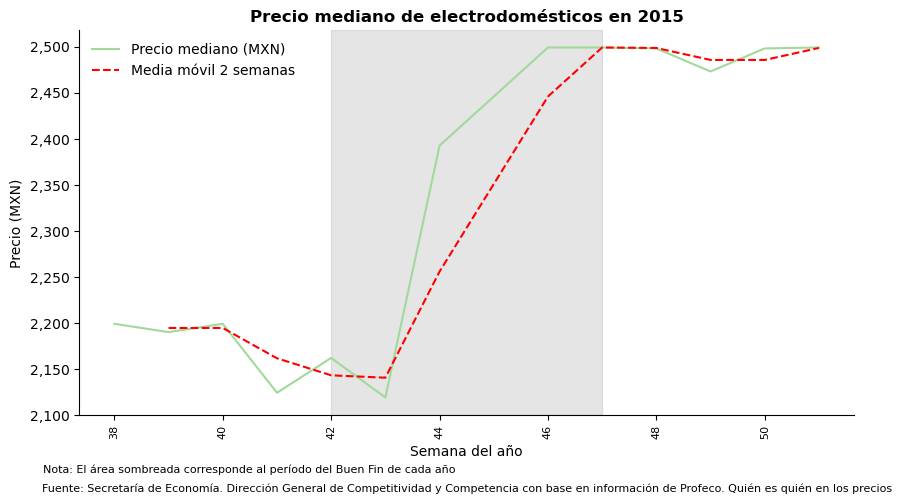

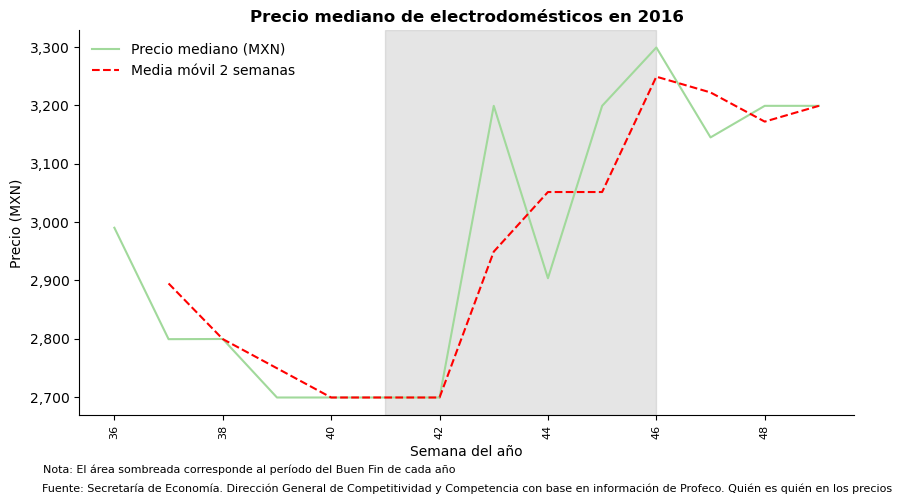

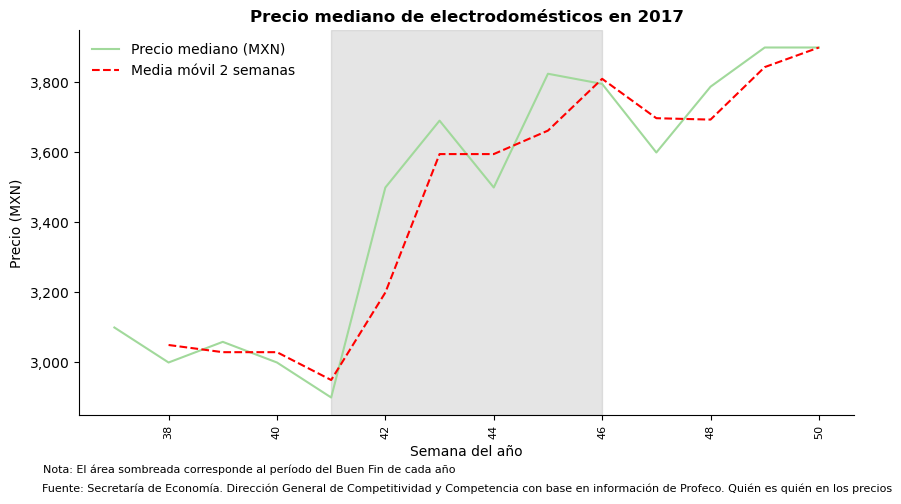

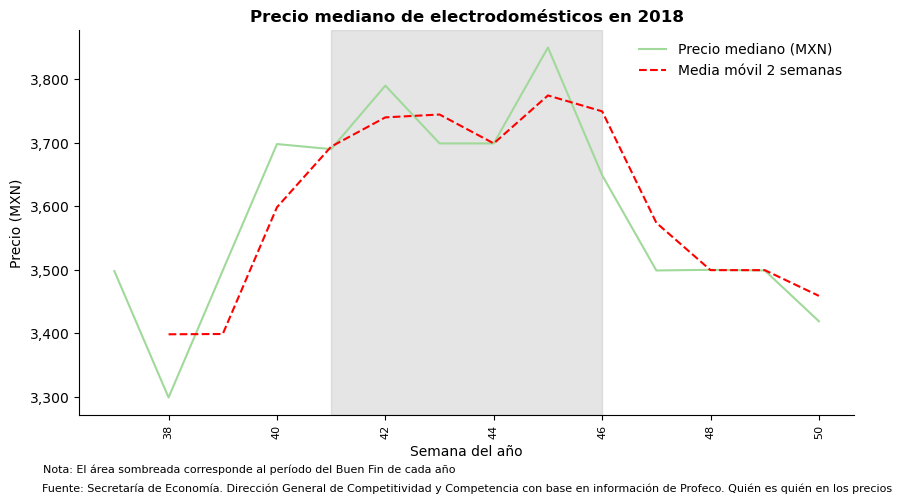

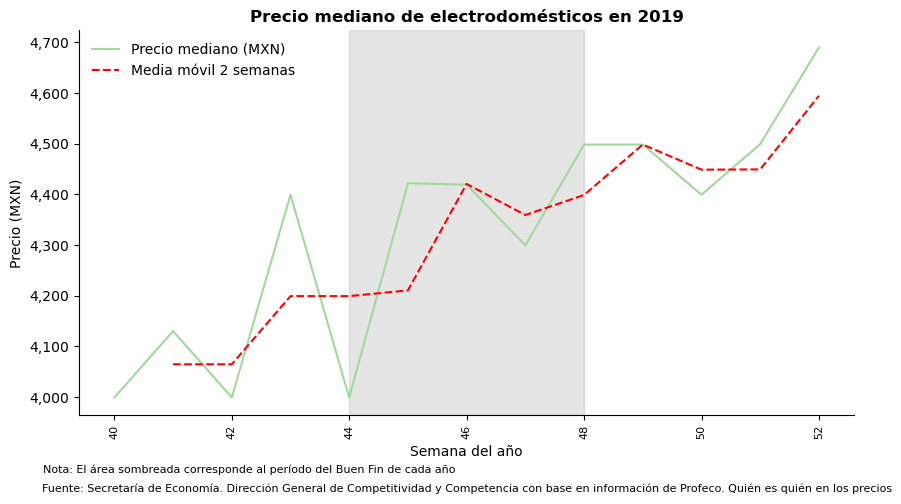

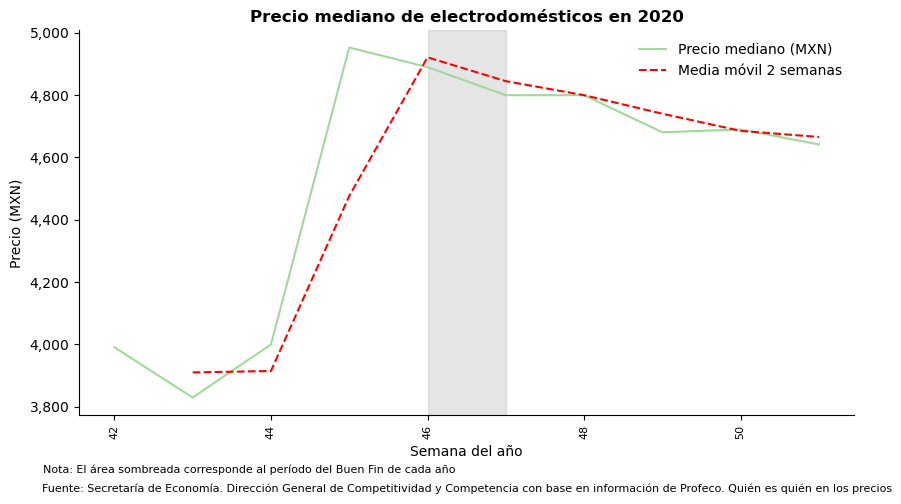

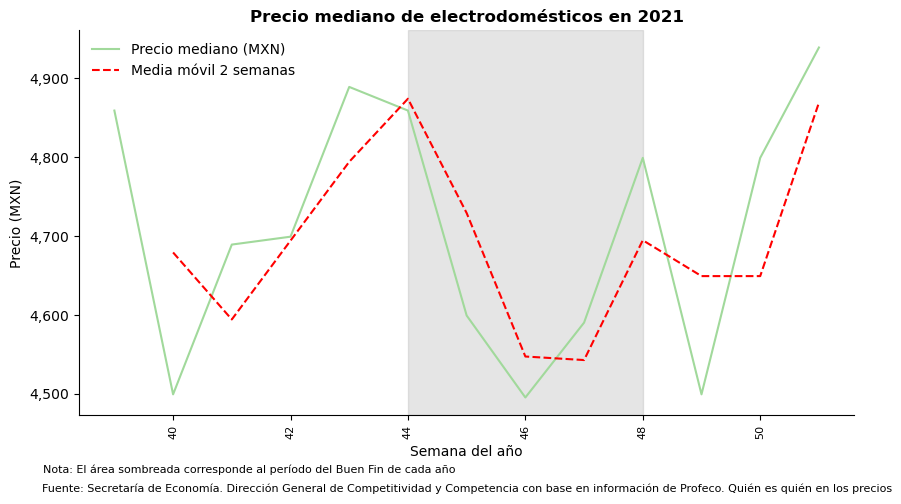

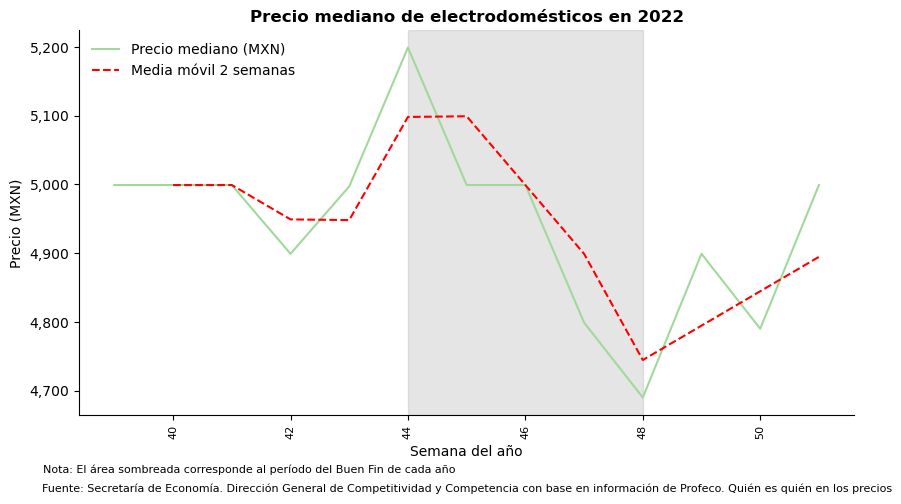

In [228]:
#Graficar precio medio de electrodomésticos para cada año. Quiero el registro de cada semana. Utilizar la función elementos_grafica()
for year in electrodomesticos["fecharegistro"].dt.year.unique():
    
    electrodomesticos_year = electrodomesticos[electrodomesticos["fecharegistro"].dt.year==year]
    electrodomesticos_year = electrodomesticos_year.groupby("semana_registro").median()
    electrodomesticos_max = electrodomesticos_year["precio"].max()
    electrodomesticos_min = electrodomesticos_year["precio"].min()
    electrodomesticos_year.plot(y="precio",figsize=(10,5),color="#a1d99b")
    #Gráficar max y min
    #plt.axhline(electrodomesticos_max, color="r", linestyle="--")
    #plt.axhline(electrodomesticos_min, color="r", linestyle="--")
    #media movil de 4 semanas
    electrodomesticos_year["precio"].rolling(2).median().plot(figsize=(10,5),style="r--")
    #Precio máximo
    #Incluir área de Buen Fin con base en la lista periods. Poner el área en gris con transparencia 0.2 y etiquetarla con "Buen Fin"
    for period in periods:
        start_date, end_date = period.split("_")
        start_week = datetime.datetime.strptime(start_date, "%Y-%m-%d").isocalendar()[1]
        end_week = datetime.datetime.strptime(end_date, "%Y-%m-%d").isocalendar()[1]
        if year == int(start_date[:4]):
            plt.axvspan(start_week, end_week, alpha=0.2, color='grey')
            #plt.text(start_week+1, (electrodomesticos_year["precio"].min() + electrodomesticos_year["precio"].max())/2, "Buen Fin", size=8, weight="bold")


            # Add titles, labels and legend
    plt.xticks(rotation=90, size=8)
    plt.grid(False)
    plt.title("Precio mediano de electrodomésticos en "+str(year), size=12, weight="bold")
    plt.xlabel("Semana del año")
    plt.ylabel("Precio (MXN)")
    plt.legend(['Precio mediano (MXN)','Media móvil 2 semanas'], frameon=False)
        #Eliminar los bordes
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Eje y con separadores de miles
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    #Añadir fuente
    
    plt.text(0.22, -0.15, "Nota: El área sombreada corresponde al período del Buen Fin de cada año", size=8, ha="center", transform=plt.gca().transAxes)
    plt.text(0.5, -0.2, "Fuente: Secretaría de Economía. Dirección General de Competitividad y Competencia con base en información de Profeco. Quién es quién en los precios", size=8, ha="center", transform=plt.gca().transAxes)
    #Salvar la gráfica
    plt.savefig("profeco/precio_med_elect_sem_"+str(year)+".png", bbox_inches="tight")


C:\Users\claud\AppData\Local\Temp\ipykernel_29688\1840527217.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("fecharegistro").median()
C:\Users\claud\AppData\Local\Temp\ipykernel_29688\1840527217.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("fecharegistro").median()
C:\Users\claud\AppData\Local\Temp\ipykernel_29688\1840527217.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Eithe

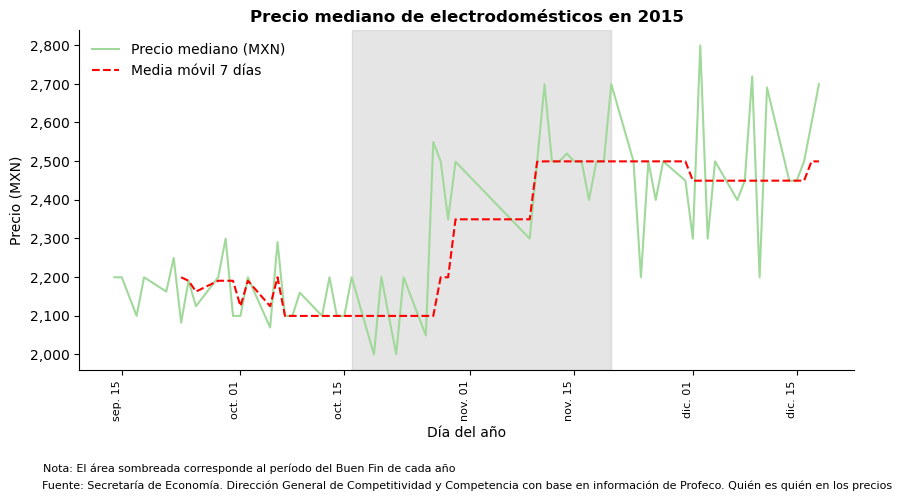

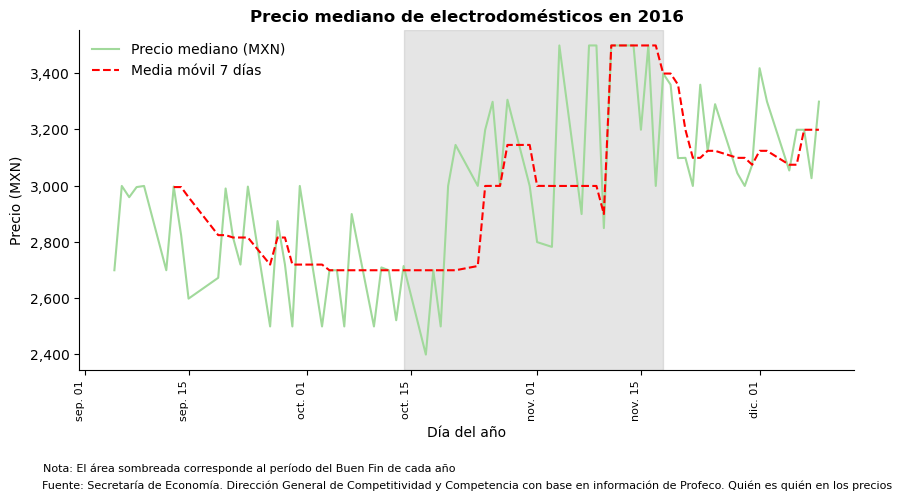

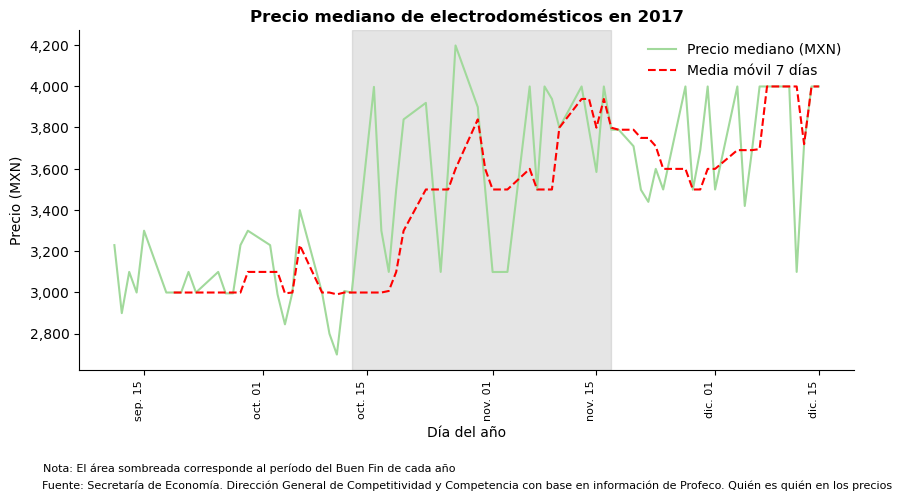

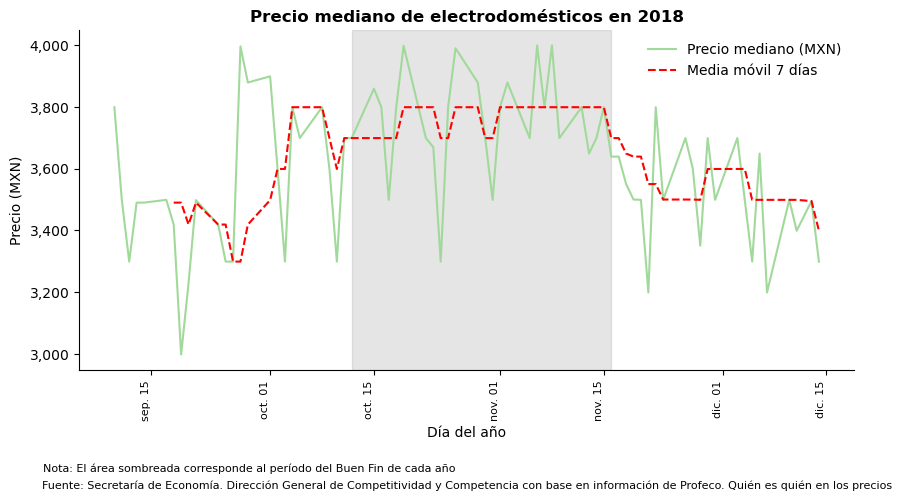

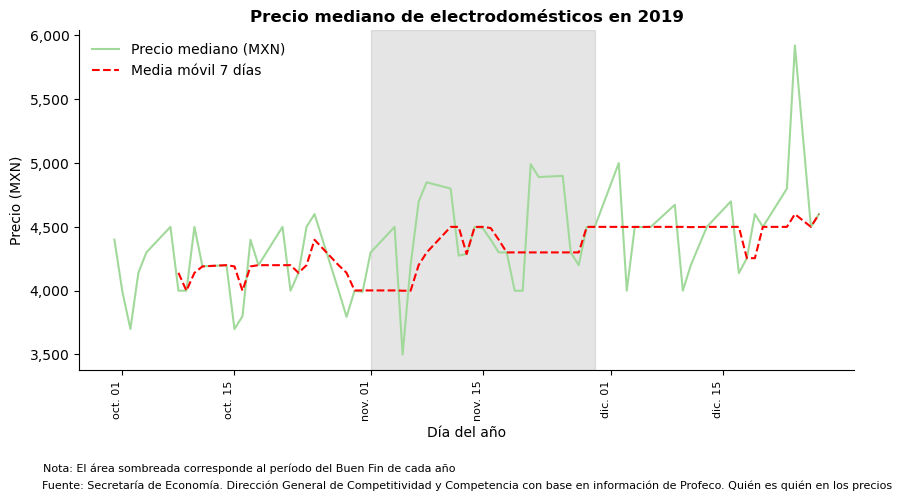

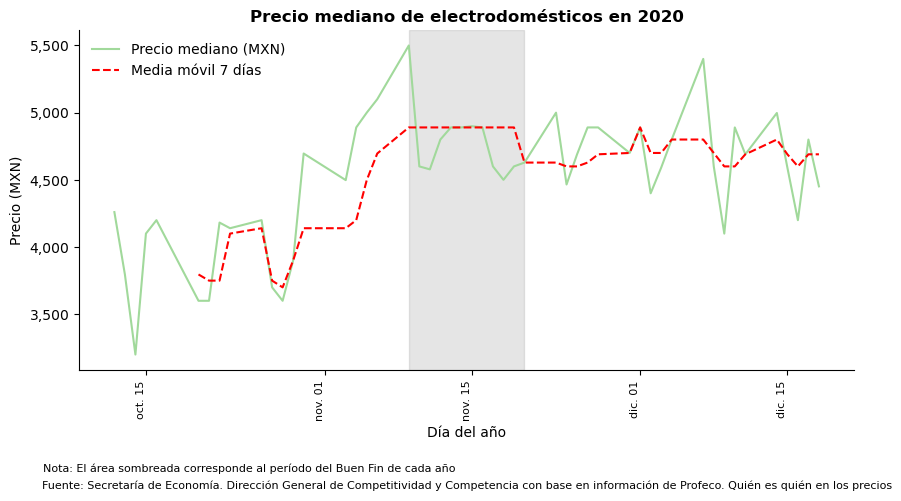

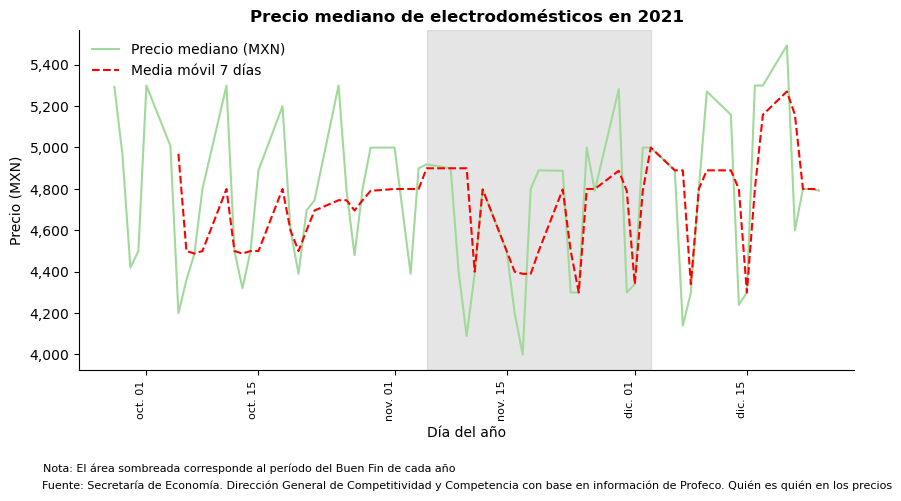

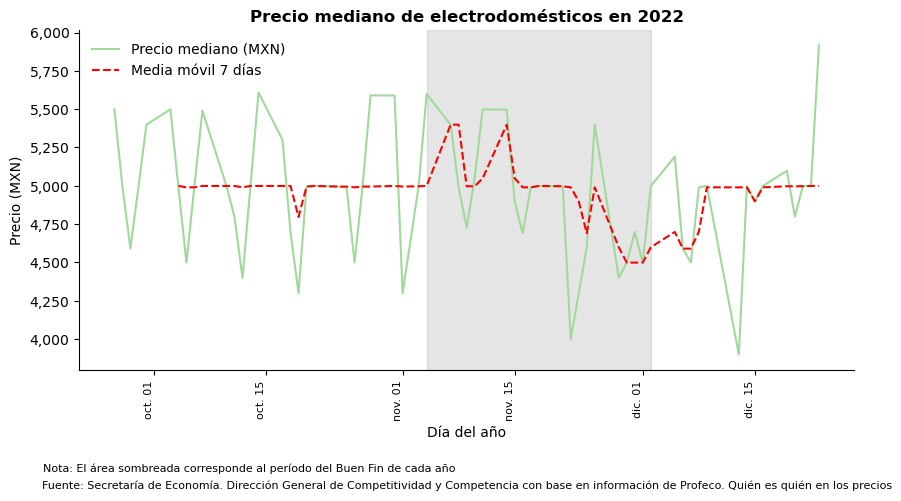

In [239]:
#fmt = ticker.LocaleFormatter(locale.getlocale())

#Graficar los datos por día para cada año
for year in electrodomesticos["fecharegistro"].dt.year.unique():
    electrodomesticos_year = electrodomesticos[electrodomesticos["fecharegistro"].dt.year==year]
    electrodomesticos_year = electrodomesticos_year.groupby("fecharegistro").median()
    electrodomesticos_year.plot(y="precio",figsize=(10,5),color="#a1d99b")
    #media movil de 4 semanas
    electrodomesticos_year["precio"].rolling(7).median().plot(figsize=(10,5),style="r--")
    #Precio máximo
    electrodomesticos_max = electrodomesticos_year["precio"].max()
    electrodomesticos_min = electrodomesticos_year["precio"].min()
    #plt.axhline(electrodomesticos_max, color="r", linestyle="--")
    #plt.axhline(electrodomesticos_min, color="r", linestyle="--")
    #Incluir área de Buen Fin con base en la lista periods. Poner el área en gris con transparencia 0.2 y etiquetarla con "Buen Fin"
    for period in periods:
        start_date, end_date = period.split("_")
        start_week = datetime.datetime.strptime(start_date, "%Y-%m-%d")
        end_week = datetime.datetime.strptime(end_date, "%Y-%m-%d")
        if year == int(start_date[:4]):
            plt.axvspan(start_week, end_week, alpha=0.2, color='grey')
            #plt.text(start_week+1, (electrodomesticos_year["precio"].min() + electrodomesticos_year["precio"].max())/2, "Buen Fin", size=8, weight="bold")


            # Add titles, labels and legend
    plt.xticks(rotation=90, size=8)
    plt.grid(False)
    plt.title("Precio mediano de electrodomésticos en "+str(year), size=12, weight="bold")
    plt.xlabel("Día del año")
    plt.ylabel("Precio (MXN)")
    plt.legend(['Precio mediano (MXN)','Media móvil 7 días'], frameon=False)
        #Eliminar los bordes
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Eje y con separadores de miles
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    #Eje x con fechas en formato corto con mes en texto corto
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    #Añadir fuente
    
    plt.text(0.22, -0.3, "Nota: El área sombreada corresponde al período del Buen Fin de cada año", size=8, ha="center", transform=plt.gca().transAxes)
    plt.text(0.5, -0.35, "Fuente: Secretaría de Economía. Dirección General de Competitividad y Competencia con base en información de Profeco. Quién es quién en los precios", size=8, ha="center", transform=plt.gca().transAxes)
    plt.savefig("profeco/precio_med_elect_dia_"+str(year)+".png", bbox_inches="tight")